# Exploring Weather Trends Report

### tools for each step?  
    Python (pandas for data processing and matplotlib for visualization)

### How did you calculate the moving average? 
       Rolling average for 5 years (mean)

### What were your key considerations when deciding how to visualize the trends?  
    The range of data, the average


- Import the libraries and Load the Dataset (CSV file) & Processing the data (Missing value)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('../input/dataset/results.csv')

In [3]:
df.head()

,year,city,city_temp,global_temp
0,1843,Mecca,25.16,8.17
1,1844,Mecca,19.05,7.65
2,1845,Mecca,22.46,7.85
3,1846,Mecca,NaN,8.55
4,1847,Mecca,NaN,8.09


In [4]:
df.describe()

,year,city_temp,global_temp
count,171.000000,156.000000,171.000000
mean,1928.000000,25.608910,8.536784
std,49.507575,0.845988,0.464516
min,1843.000000,19.050000,7.560000
25%,1885.500000,25.260000,8.180000
50%,1928.000000,25.605000,8.520000
75%,1970.500000,26.020000,8.760000
max,2013.000000,27.570000,9.730000


- The minimum value of City temperature was 19 and the maximum value was 27.5
- The minimum value of Global temperature was 7.5 and the maximum value was 9.7
- 11.5 degrees difference between Mecca temperature and the global temperature with maximum difference 17.8 degrees

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         171 non-null    int64  
 1   city         171 non-null    object 
 2   city_temp    156 non-null    float64
 3   global_temp  171 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.5+ KB


In [6]:
df['city_temp'] = df['city_temp'].fillna(df['city_temp'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         171 non-null    int64  
 1   city         171 non-null    object 
 2   city_temp    171 non-null    float64
 3   global_temp  171 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.5+ KB


- The data types for each city_temp and global_temp are ‘float’, so we can use it to plot the data.
- Handle the missing values (15 values were missing) in the city_temp column with the mean.

### Line chart shows the temperature without moving average


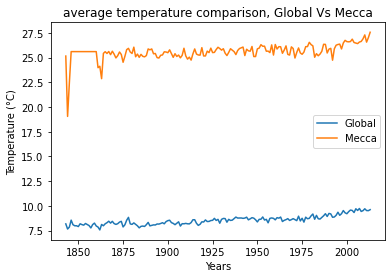

In [7]:
#Plot Mecca city Temperature Vs. global temperature

plt.plot(df['year'],df['global_temp'],label='Global')
plt.plot(df['year'],df['city_temp'],label='Mecca')
plt.legend()
plt.title("average temperature comparison, Global Vs Mecca")
plt.xlabel("Years")
plt.ylabel("Temperature (°C)") 
plt.show()

###  Calculate Moving averages to use it in the line chart.

In [8]:
df["rolling_Average_city"] = df["city_temp"].rolling(window = 5).mean()
df.reset_index(inplace = True, drop = True)

df["rolling_Average_global"] = df["global_temp"].rolling(window = 5).mean()

In [9]:
df.head()

,year,city,city_temp,global_temp,rolling_Average_city,rolling_Average_global
0,1843,Mecca,25.16000,8.17,NaN,NaN
1,1844,Mecca,19.05000,7.65,NaN,NaN
2,1845,Mecca,22.46000,7.85,NaN,NaN
3,1846,Mecca,25.60891,8.55,NaN,NaN
4,1847,Mecca,25.60891,8.09,23.577564,8.062


In [10]:
df.tail()

,year,city,city_temp,global_temp,rolling_Average_city,rolling_Average_global
166,2009,Mecca,26.90,9.51,26.602,9.580
167,2010,Mecca,27.30,9.70,26.768,9.580
168,2011,Mecca,26.57,9.52,26.798,9.578
169,2012,Mecca,27.02,9.51,26.886,9.534
170,2013,Mecca,27.57,9.61,27.072,9.570


###  Used Moving average in the Line chart.

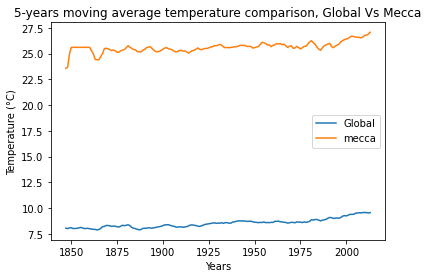

In [11]:
#Compare average temp. 

plt.plot(df['year'],df['rolling_Average_global'],label='Global')
plt.plot(df['year'],df['rolling_Average_city'],label='mecca')
plt.legend()
plt.title("5-years moving average temperature comparison, Global Vs Mecca")
plt.xlabel("Years")
plt.ylabel("Temperature (°C)") 
plt.show()

## Observations.
- The difference between Mecca temp and global temp was the temperature degree which in Mecca the mean temperature was 25.6 °C, compared to global temperature where the mean temp was 8.5 °C degrees.

In [12]:
print("mean value of Mecca tempartue before 2000 year: ", df[df['year'] < 2000]["city_temp"].mean())
print("mean value of Mecca tempartue after 2000 year: ",df[df['year'] > 2000]["city_temp"].mean())

mean value of Mecca tempartue before 2000 year:  25.5057557569819
mean value of Mecca tempartue after 2000 year:  26.776923076923076


In [13]:
print("mean value of global tempartue before 2000 year: ", df[df['year'] < 2000]["global_temp"].mean())
print("mean value of global tempartue after 2000 year: ",df[df['year'] > 2000]["global_temp"].mean())

mean value of global tempartue before 2000 year:  8.449171974522292
mean value of global tempartue after 2000 year:  9.543846153846154


<AxesSubplot:xlabel='year', ylabel='city_temp'>

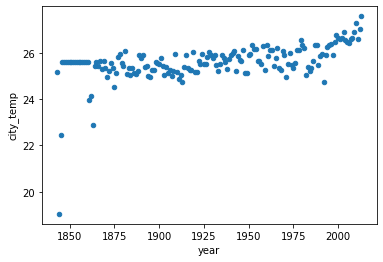

In [14]:
#correlations between year and temperature.
df.plot.scatter('year', 'city_temp')

<AxesSubplot:xlabel='year', ylabel='global_temp'>

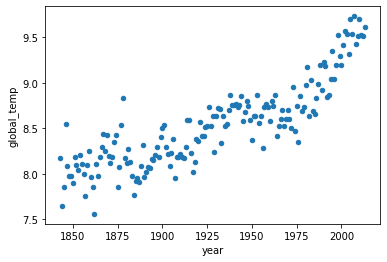

In [15]:
df.plot.scatter('year', 'global_temp')

- The mean value of global temperature before the 2000 year was 8.4 °C, and after the 2000 year was 9.5 °C (the mean value increased by 1 degree).
- In Mecca city the mean value of the temperature before the 2000 year was 25.5 °C, and after 2000 was 26.8 °C degrees (the mean value increased by about 1 degree).
- The change in both was similar in Mecca’s temperature and also in the global temperature where the mean temperature increased by 1 °C degree during 1843 to 2013.

- The correlation between the temperature and year column was a positive correlation which the temp degree increased as the year increased.
- We can assume that the temperature will be higher in the next few years also.